## Introduction
In this tutorial, I will only explain to you what you need to understand the Kaggle simulation virtual environment, nothing more, nothing less. In my [repository on github](https://github.com/BEPb/Kaggle_step_by_step_ConnectX) you can download and get acquainted with the step-by-step description and development of solutions for this competition.

I have prepared a whole course of training material for this competition and I will be glad to share with you:
1. [000.intro Kaggle Environment](https://www.kaggle.com/andrej0marinchenko/000-intro-kaggle-environment)
1. [001. Getting Started ConnectX](https://www.kaggle.com/andrej0marinchenko/001-getting-started-connectx)
    1. [00.simple_agent_random](https://www.kaggle.com/andrej0marinchenko/00-simple-agent-random)
    1. [01.simple_agent_negamax](https://www.kaggle.com/andrej0marinchenko/01-simple-agent-negamax)
    1. [02.initial_agent](https://www.kaggle.com/andrej0marinchenko/02-initial-agent)
    1. [03.one_step_lookahead_agent](https://www.kaggle.com/andrej0marinchenko/03-one-step-lookahead-agent)
    1. [04.Nstep_lookahead_agent](https://www.kaggle.com/andrej0marinchenko/04-nstep-lookahead-agent)
    1. [05.Fast Nstep lookahead agent](https://www.kaggle.com/andrej0marinchenko/05-fast-nstep-lookahead-agent)
1. [002. Q-Learning step-by-step instruction](https://www.kaggle.com/andrej0marinchenko/002-q-learning-step-by-step-instruction)
    1. [06.play_with_me](https://www.kaggle.com/andrej0marinchenko/06-play-with-me)
    1. [07.try_to_win_my_agent](https://www.kaggle.com/andrej0marinchenko/07-try-to-win-my-agent)

**Content:**
1. [Introduction:](#1)
    1. [Hello Kagglers](#2)
    1. [We study the composition of the virtual environment ](#3)
    1. [Importing Dependencies](#4)
1. [Creating a game environment and base agents](#5)
    1. [Let's take a closer look at the features of our natural simulation environment](#6)
    1. [Let's see what other simulations we propose to create in this natural environment](#7)
1. [Learning to create agents](#8)
    1. [Creating an intelligent agent](#9)
    1. [Evaluating agent](#10)
    1. [Calculating Win percentage](#11)
1. [Creating Submission file](#12)
1. [Validating submission file](#13)

### Hello Kagglers
This post was written by me after taking the lead in this type of competition. I went through many training courses, but it was the topic of simulations that I liked the most and I decided to share my knowledge for those who want to figure out what it is.
Connect Four is a game where two players take turns dropping colored discs into a vertical grid. Each
 the player uses their color (usually red or yellow) and the object of the game is to be the first to get four discs in a row (by
vertical, horizontal or diagonal).

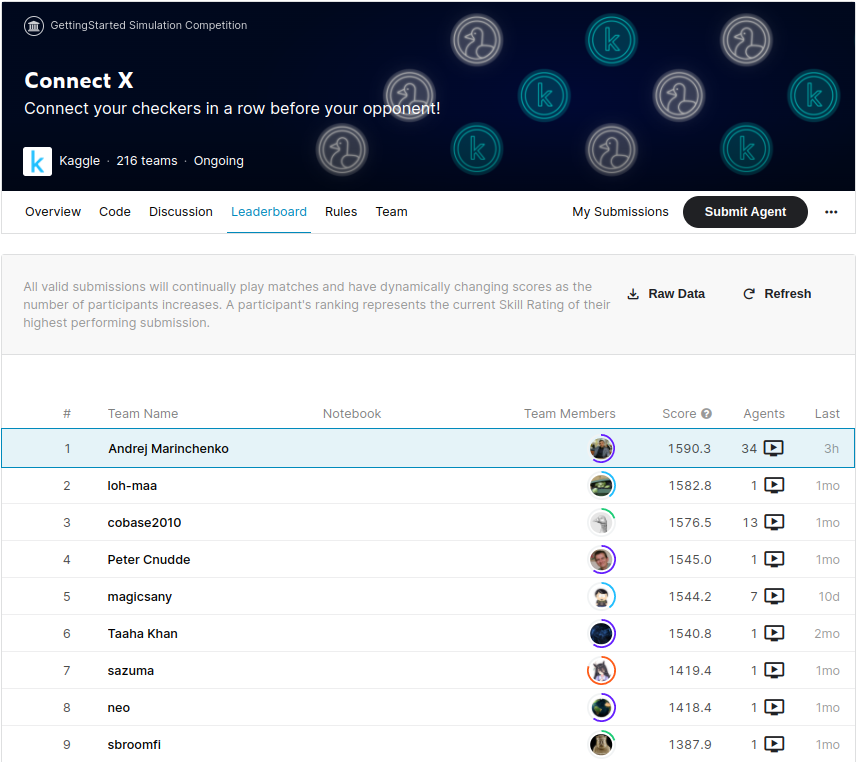

 You can find the competition itself [here](https://www.kaggle.com/c/connectx).
For the purpose of familiarization and training on cable, there is a separate training course dedicated to simulators and for 4
theoretical classes + 4 practical exercises after each will immerse you in this world, and according to the results you
They will also issue a certificate like this:

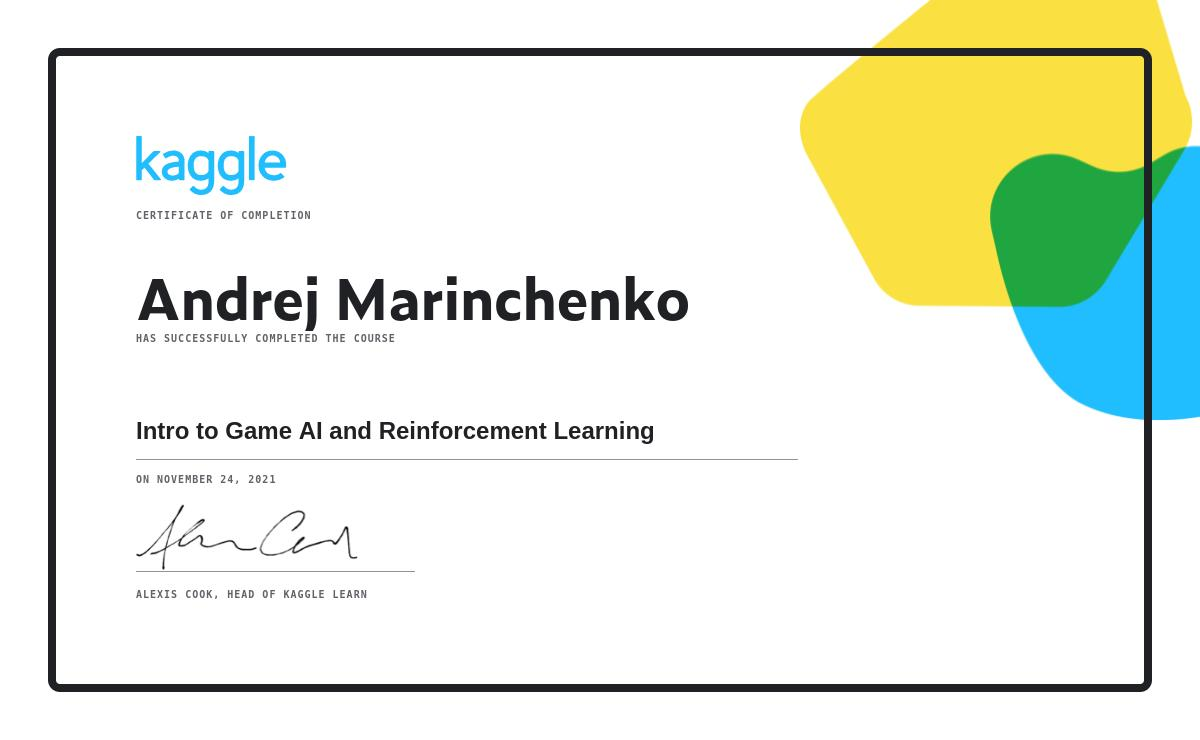

<a id="3"></a> <br>
### We study the composition of the virtual environment

Have you ever wondered what the next line of code means?
It is this line at the beginning of jupiter-notebook that installs the necessary packages. In fact, by simply copying from the github repository to your Python library on your laptop core virtual computer.

In [ ]:
# !pip install kaggle-environments>=0.1.6
!pip install kaggle-environments -U

After we have installed the caggle virtual environment library in our game directory of the simulator
ConnectX 4 files and another folder `__pycache__` :
```command line
connectx.js
connectx.json
connectx.py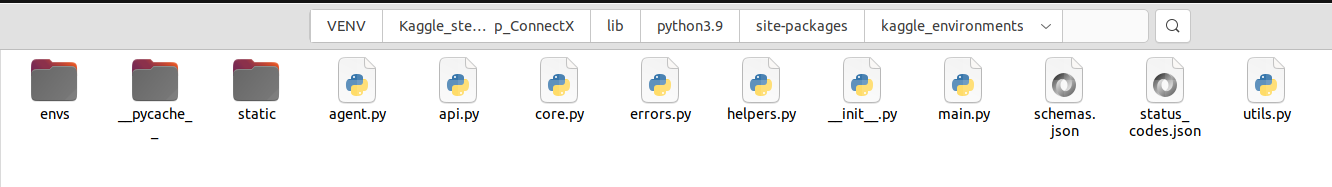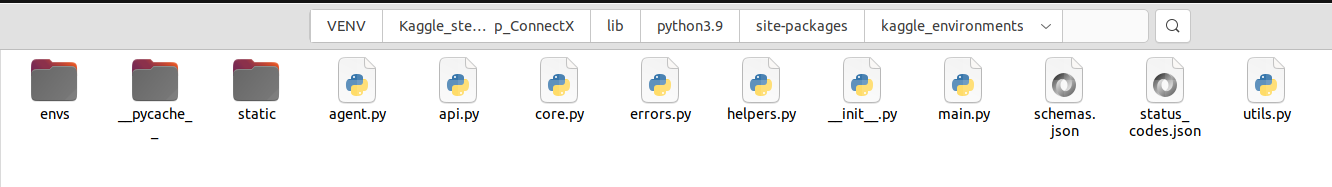
test_connectx.py
```

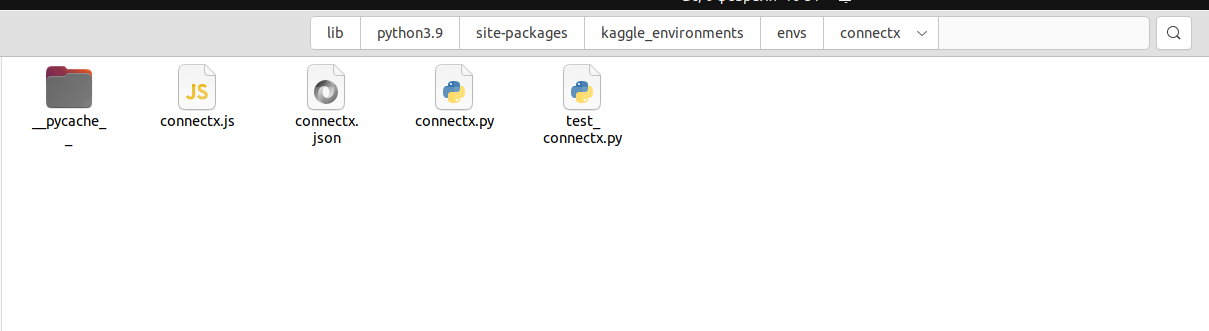


- the `connectx.js` file is responsible for drawing our game environment
- the `connectx.json` file is responsible for the parameters of our game environment:
    * number of players - 2,
    * the size of the playing field - 7 by 6 cells,
    * the number of balls that must be set - 4,
    * the location of the balls on the previous field,
    * time to move - 2 seconds,
    * labels loss\draw\win - -1\0\1,
    * filling the playing field: 0 - empty, 1 - player's ball No. 1, 2 - player's ball No. 2,
    * the game continues until one of the players wins or all the fields are filled.
- the `connectx.py` file is responsible for running the first two files (drawing and getting the game process parameters),
   execution of the game between two models, it also has two of its own simplest models by default
   (random_agent, negamax_agent). Functions apply here:
    * play - function to determine whether positions are occupied by balls on the playing field;
    * is_win - function to determine victory (when 4 balls lined up in one line horizontally, vertically or along
      diagonals);
    * interpreter - the main function that launches the game process;
    * renderer - print the current playing field
- file `test_connectx.py` with a set of game test functions;
- `__pycache__` folder contains cache of executable files.

We have listed only specific files related to only one game `ConnectX` except for them in the root directory
The virtual environment library has 10 more files related to the virtual environment itself.

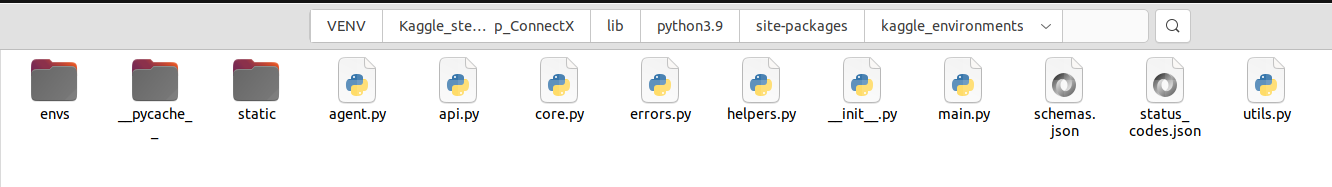

- `__init__.py` - virtual environment initialization file (this is where the version of the virtual environment is registered, on
  at the time of writing this tutorial 07.02.2022 version "1.8.12") describes the parameters for launching a virtual environment,
  and through it, one game from the set is processed and launched, in our case, connectX);
- `main.py` - this is where the input parameters of the virtual environment are processed (via the argument parser), and
  launch is in progress;
- `core.py` - the core of our virtual environment, starting functions are indicated here (register, evaluate, make and act_agent) and
  also the Environment class itself. The line `env = make("connectx", debug=False)` is described in this
  file, the first parameter in brackets is the name of the game to be launched, and the second debugging mode is False - disabled, True -
  enabled means display error message or not;
- `agent.py` - agent classes (local and web agents) are described here;
- `api.py` - this describes the functions of requesting a playlist of team games and episodes from www.kaggle.com;
- `status_codes.json` - all errors when loading the game model are described here;
- `errors.py` - process error values ​​from the status_codes.json file and display a message about the corresponding class
  errors;
- `helpers.py` - various secondary functions are described here, for example, converting set values ​​to coordinates
  boards along the x and y axis;
- `schemas.json` - the main parameters of the game process are described here;
- `utils.py` - description of utility functions used in the environment.

In addition to the ConnectX simulator, the Cagle virtual environment provides 8 more simulators, a total of 9, each is located in
your directory. Thus, by installing the virtual environment repository, you can use any of the 9 simulators.


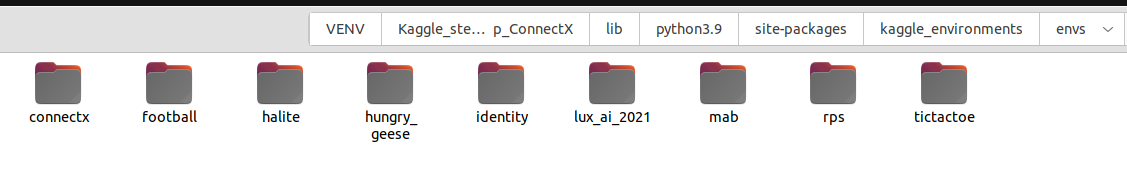


<a id="4"></a> <br>
# Importing Dependencies

In [ ]:
'''
Python 3.9 Reinforcement Learning Python Starter Program - Reinforcement Learning
Filename `000.intro_Kaggle_Environment.ipynb`

Version: 0.1
Author: Andrey Marinchenko
Date: 2022-02-07

let's use one of the kaggle_environments test games, in particular, with the "ConnectX" environment
'''
from kaggle_environments import make, evaluate, utils, agent  # connect the library kaggle_environments simulation virtual environment and its functions
'''
make - create an environment written in file `core.py`
evaluate - the function of evaluating and returning a reward for one or more episodes is written in the file `core.py`
utils - description of the functions of the utilities used in the environment written in file `utils.py`
agent - agent classes (local and web agent) are described in file `agent.py`
'''

# additional libraries, we will need them in this notebook
import random  # connect the library to generate random numbers, letters, random selection of sequence elements
import numpy as np  # connect the library general mathematical and numerical operations
import os  # connect the library operating system
import inspect  # connect the library provides several useful functions to help get information about live objects such as modules, classes, methods, functions, tracebacks

If you see the error message "Failed: football: No module named 'gfootball'" we are advised not to pay attention to this, this error certainly does not make any sense regarding our ConnectX environment and within the framework of this simulation, it will not interfere with us. For the sake of fairness, I want to note the fact that despite  [complaints about the bug](https://www.kaggle.com/c/connectx/discussion/124392), this is not the first time, no significant measures have been taken to eliminate it. Somewhere inside, a perfectionist yells about the imperfection of this system.

<a id="5"></a> <br>
# Creating a game environment and base agents
After we have connected the necessary kaggle libraries to create an instance of the game environment of the `ConnectX` simulator, we need to apply the `make` function 

In [ ]:
env = make("connectx")  
'''
Very simple syntax, inside the function we indicate the name of the simulator, for this competition it is ConnectX. 
The ver variable is our virtual environment. Despite the fact that no visual changes occurred after the launch, we have already created 
an instance of our virtual environment in which we will continue to use our agent.
'''

In [ ]:
# List of available agents by default registered in our created environment
print(list(env.agents))

* The "random" agent chooses (uniformly) randomly from the set of allowed moves.
* The "negamax" agent is a variant of a simplified form of the minimax search algorithm. You can find more details [here](https://en.wikipedia.org/wiki/Negamax). if it's very simple, then this is another search tree algorithm

The minmax algorithm is mainly used for games based on finding an opponent, which means that this algorithm
more widely used in games that consist of 2 players, such as match 3, chess, backgammon and others...
This algorithm suggests that on each turn it evaluates from two possible intercalated solutions, and
chooses what is most beneficial in this situation. Since the study of all possible options and the definition
the next step will entail a large investment of time and space,
which complicates the processing and forces to limit the ongoing deep search.

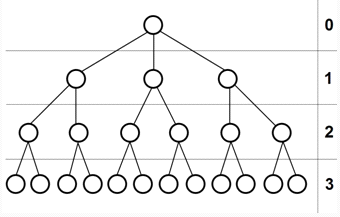

In the code cell below, we will take two agents who always move randomly, not consciously, without evaluating which move
do better in the given situation and let them play until one of them wins that round of the game.

In [ ]:
env.run(["random", "random"])  # This line of code starts the game
env.render(mode="ipython")  # this line of code shows the game in our laptop, from this we can conclude that the game will take place even if this line of code does not exist

In the next code cell, we will run an agent whose move is randomly chosen without thinking about the outcome of the game against an agent with negamax algorithms. The result, I think, is easy to predict.... 

In [ ]:
'''Please note that the agent that is specified in the function first and makes the first move.'''
env.run(["negamax", "random"])  # This line of code starts the game
env.render(mode="ipython")  # # this line of code shows the game in our laptop, from this we can conclude that the game will take place even if this line of code does not exist

In [ ]:
'''Well, let's see how two agents play who make a choice consciously against each other.'''
env.run(["negamax", "negamax"])  # This line of code starts the game
env.render(mode="ipython")  # this line of code shows the game in our laptop, from this we can conclude that the game will take place even if this line of code does not exist

<a id="6"></a> <br>
### Let's take a closer look at the features of our natural simulation environment

In [ ]:
help(env)  # You can use the built-in simulation environment description function

From this description we can derive the following functions:

- env.clone()  - A copy of the current environment

- env.debug_print('error')  - function to print debug messages of our application

- env.play(agents=[None, "random"])  - Renders a visual representation of the environment and allows interactive action selection.

- reset(num_agents=None)  - Resets the environment state to the initial step. Resets the state assuming a fixed number of agents.

- run(agents)  - specify the list of agents from which you want to get actions. Returns tuple of lists the agent states of all steps executed

- step(actions, logs=None)  - Execute the environment interpreter using the current state and a list of actions. Actions to pair up with the current agent states.

- toJSON() - Specifcation and current state of the Environment instance.

- train(agents=[])  - Setup a lightweight training environment for a single agent. This is designed to be a lightweight starting point which can be integrated with other frameworks (i.e. gym, stable-baselines). The reward returned by the "step" function here is a diff between the current and the previous step.

In [ ]:
'''A copy of the current environment'''
env.clone()

In [ ]:
'''function to print debug messages of our application'''
env.debug_print('error')

In [ ]:
'''Renders a visual representation of the environment and allows interactive action selection.'''
env.play(agents=[None, "random"])  

I wrote about this bug, we are waiting for a response from [technical support](https://www.kaggle.com/c/connectx/discussion/124392)

In [ ]:
'''Resets the environment state to the initial step. Resets the state assuming a fixed number of agents.'''
env.reset()  # as a result of entering this command, we will receive a report on the current state of our virtual 
             # environment, 42 zeros that we see characterize our field of 6 by 7 cells, in which the players did not make moves.

In [ ]:
env = make("connectx")  
'''Now let's create our first simple agents. The first agent will always throw the ball in the second cell, and 
the second agent will always throw the ball in the sixth cell. Let me remind you that by default in the virtual 
connection environment we have only 7 cells horizontally and 6 cells vertically. It should also be noted that the 
numbering of cells does not start from one, but from zero ...
'''
agent1 = 1  # in this line we set our first agent
agent2 = 5  # in this line we set our second agent

agents = [agent1, agent2]  # here we will create a list of our agents
env.run(agents)  # specify the list of agents from which you want to get actions. Returns tuple of lists the agent states of all steps executed
env.render(mode="ipython",width=500,height=500)  # for ease of display, select a screen size of 500 by 500 pixels

In [ ]:
# step(actions, logs=None)  # Execute the environment interpreter using the current state and a list of actions. Actions to pair up with the current agent states.
'''
in order to see how the values of our environment variables change on each turn, we will apply the following function, but it will have to be applied in a loop and in training mode.
In this example, we will use two agents:
the first agent will always move to the zero cell, and the second agent will move randomly.
'''
env=make("connectx")  # in this line we create our virtual environment


trainer = env.train([None, "random"])  # Training agent in first position (player 1) against the default random agent.

done = False  # set a boolean variable done
while not done:  # set the loop condition until the game status is false (i.e. it does not end with the victory of one of the players) it continues
    action = 0 # Action for the agent being trained.
    '''in next line we get all the necessary information about the state of the game and assign the result of this state to new variables'''
    obs, reward, done, info = trainer.step(action)
    
    '''in next line we print the result of the game state'''
    print('Playing field state \n', obs, '\n Reward: ', reward, ', Done:', done, ', Add info:', info)
    
env.render(mode="ipython",width=500,height=500)  # for ease of display, select a screen size of 500 by 500 pixels

As you can see, at first we printed out the result of each move. The state of the board on each move is a list of 42 integers, before the start of the game it consisted of only 42 zeros, on the first move the first player threw the ball into the zero cell, and on the second move the second player was random. Thus, you see in the board line the last 7 digits characterize the bottom line of the game board, and the first 7 values ​​mean the positions of the top line. I hope this is clear to you.

In [ ]:
'''In the code cell above, we displayed only the data that we were interested in, but we have the ability
to display all the data for the last game using the command toJSON()'''

env.toJSON() # Specifcation and current state of the Environment instance.

In [ ]:
env = make("connectx", debug=True)
env.render()

In [ ]:
'''Above, we got acquainted with the simulation display mode mode="ipython", now let's explore other modes'''
env.run(["negamax", "negamax"])
out = env.render()  # simulation ran without display

# out = env.render(mode="ansi")
# out = env.render(mode="json")
# out = env.render(mode="human") # 
print(out)

In [ ]:
env.run(["negamax", "negamax"])


out = env.render(mode="html")  # the simulation has run and the result is saved to the output variable in html format
'''the simulation will be displayed in a very cumbersome html format, for this reason I left 
the following line commented out, but if you have a desire, you can see for yourself
'''
# print(out)

In [ ]:
env.run(["negamax", "negamax"])
out = env.render(mode="ansi")  # very convenient and simple mode of displaying the result of the game
print(out)

In [ ]:
env.run(["negamax", "negamax"])
out = env.render(mode="json")  # we have already met with this format, but this time all the information is displayed line by line
# out = env.render(mode="human") # 
print(out)

In [ ]:
env.run(["negamax", "negamax"])
out = env.render(mode="human")    # simulation ran without display
print(out)

<a id="7"></a> <br>
## Let's see what other simulations we propose to create in this natural environment.

In [ ]:
'''
The make function is used to create environments that can then run the game given agents. Agents refer 
to programmed bots that play the game given observations of the game itself. In addition to making the 
environment, you may also pass in special configurations such as the number of episode steps
'''
# Example "tictactoe":
env = make("tictactoe")

print(*env.agents)  # The list of available default agents.

# Training agent in first position (player 1) against the default random agent.
trainer = env.run(["random", "random"])
env.render(mode="ipython",width=500,height=500)

In [ ]:
# Example "tictactoe":
env = make("halite")

print(*env.agents)  # The list of available default agents.

# Training agent in first position (player 1) against the default random agent.
trainer = env.run(["random", "random"])
env.render(mode="ipython",width=500,height=500)

In [ ]:
# Example "hungry_geese":
env = make("hungry_geese")

print(*env.agents)  # The list of available default agents.

# Training agent in first position (player 1) against the default random agent.
trainer = env.run(["random", "random"])
env.render(mode="ipython",width=500,height=500)

In [ ]:
# Example "lux_ai_2021":
env = make("lux_ai_2021")

print(*env.agents)  # The list of available default agents.

trainer = env.run(["random_agent", "js_simple_agent"])
env.render(mode="ipython",width=500,height=500)

In [ ]:
# Example "mab":
env = make("mab")

print(*env.agents)  # The list of available default agents.

trainer = env.run(["random", "round_robin"])
env.render(mode="ipython",width=500,height=500)

In [ ]:
env = make("connectx") 
'''the following line of code allows us to see the current environment settings, which we can make changes to'''
env.configuration

- '**episodeSteps**': 1000 - this characteristic indicates the maximum number of episodes in training mode that will be produced (default = 1000 episodes)
- '**actTimeout**': 2 - agent non-response time (default = 2 seconds)
- '**runTimeout**': 1200 - game non-response time (default = 1200 seconds)
- '**columns**': 7 - number of columns of the playing field (default = 2 columns)
- '**rows**': 6 - number of lines of the playing field (default = 6 lines)
- '**inarow**': 4 - the number of cells that must be filled continuously to win vertically, horizontally or diagonally (default = 4 cells)
- '**agentTimeout**': 60 - time for the first move when initializing agents (default = 60 seconds)
- '**timeout**': 2 - agent turn time (default = 2 seconds)

In [ ]:
'''To view all the parameters of the created virtual environment, just enter the following code'''
env.specification

In [ ]:
# Create an environment instance.
env = make(
  # Specification or name to registered specification.
  "connectx",

  # Override default and environment configuration.
  configuration={"rows": 9, "columns": 10, "inarow": 4},

  # Initialize the environment from a prior state (episode resume).
  steps=[],

  # Enable verbose logging.
  debug=True
)

print(*env.agents)  # The list of available default agents.

trainer = env.run(["negamax", "negamax"])
env.render(mode="ipython",width=700,height=700)

<a id="8"></a> <br>
# Learning to create agents

In [ ]:
env = make("connectx")  
'''
Below are examples of our first simple agents and adding another repeating move. The first agent will always throw 
the ball into the second cell, even if there are no more free places in it, and
the second agent first reads the data on the state in the third cell, and if it is free, then throws a chip there. Let me remind you that
By default, in the virtual machine, the connection environment, we have a total of 7 cells horizontally and 6 cells vertically.
It should also be noted that the numbering of cells does not start from one, but from zero ...
'''
agent1 = 1  # in this line we set our first agent
agent2 = 5  # in this line we set our second agent

# Agent def accepting an observation and returning an action.
def agent3(obs):
  return [c for c in range(len(obs.board)) if obs.board[c] == 0][2]


agents = [agent1, agent3]  # here we will create a list of our agents

env.run(agents)  # specify the list of agents from which you want to get actions. Returns tuple of lists the agent states of all steps executed
env.render(mode="ipython",width=500,height=500)  # for ease of display, select a screen size of 500 by 500 pixels

In [ ]:
env = make("connectx")  
'''
In the following example, we first count the default agents and then list them
'''
agent1 = 1  # in this line we set our first agent
agent2 = 5  # in this line we set our second agent

# Agent def accepting an observation and returning an action.
def agent3(obs):
  return [c for c in range(len(obs.board)) if obs.board[c] == 0][1]

agent4 = "random" # Load a default agent called "random".
agent5 = "negamax" # Load a default agent called "random".


agents = [agent4, agent5]  # here we will create a list of our agents
env.run(agents)  # specify the list of agents from which you want to get actions. Returns tuple of lists the agent states of all steps executed
env.render(mode="ipython",width=500,height=500)  # for ease of display, select a screen size of 500 by 500 pixels

### In the following example, we will first create a primitive agent function that always goes to the fourth cell, then save the result to a file

In [ ]:
%%writefile agent7.py
# for kaggle-environments
actions = 3

def agent(observation, configuration):
    global actions
    return actions

In [ ]:
'''and now we will force a random agent to play with the agent read from the file'''
env = make("connectx")  

agent4 = "random" # Load a default agent called "random".
agent5 = "negamax" # Load a default agent called "random".


# Load an agent from a file.
agent7 = "agent7.py"

agents = [agent4, agent7]  # here we will create a list of our agents
env.run(agents)  # specify the list of agents from which you want to get actions. Returns tuple of lists the agent states of all steps executed
env.render(mode="ipython",width=500,height=500)  # for ease of display, select a screen size of 500 by 500 pixels

In [ ]:
'''you can also create a network agent and receive data from the network, 
the example below shows how to do this, but due to the lack of a deployed server, 
this game will not take place
'''
env = make("connectx")  

# Load an agent from a file.
agent7 = "agent7.py"

# Return an action from a url.
agent6 = "http://localhost:8000/run/agent"

agents = [agent7, agent6]  # here we will create a list of our agents
env.run(agents)  # specify the list of agents from which you want to get actions. Returns tuple of lists the agent states of all steps executed
env.render(mode="ipython",width=500,height=500)  # for ease of display, select a screen size of 500 by 500 pixels

<a id="9"></a> <br>


<a id="9"></a> <br>
# Creating an intelligent agent

we create an agent in form of a function that takes two parameters:

1. observation: has recent board information like current board configuration after move.
2. configuration: which has board configuration like number of columns, rows, number of rows to match

In this function an agent is created that works as follow:

- if winning move then return that column that leads to winning move
- blocks winning move of opponent
- if above two rules do not follow then drop piece at random column

In [ ]:
def my_agent(obs, config):
    opponent_piece = 1 if obs.mark == 2 else 2
    choice = []
    for col in range(config.columns):
        if check_winning_move(obs,config,col,obs.mark):
            return col
        elif check_winning_move(obs,config,col,opponent_piece):
            choice.append(col)
    if len(choice):
        return random.choice(choice)
    valid_moves = [col for col in range(config.columns) if obs.board[col] == 0]
    return random.choice(valid_moves)


'''
Helper Functions
- drop_piece: return grid status after player drops a piece
- check_winning_move : used to check if dropping a piece in a column of board leads to a winning move or not
'''

# Gets board at next step if agent drops piece in selected column
def drop_piece(grid, col, piece, config):
    next_grid = grid.copy()
    for row in range(config.rows-1, -1, -1):
        if next_grid[row][col] == 0:
            break
    next_grid[row][col] = piece
    return next_grid

# Returns True if dropping piece in column results in game win
def check_winning_move(obs, config, col, piece):
    # Convert the board to a 2D grid
    grid = np.asarray(obs.board).reshape(config.rows, config.columns)
    next_grid = drop_piece(grid, col, piece, config)
    # horizontal
    for row in range(config.rows):
        for col in range(config.columns-(config.inarow-1)):
            window = list(next_grid[row,col:col+config.inarow])
            if window.count(piece) == config.inarow:
                return True
    # vertical
    for row in range(config.rows-(config.inarow-1)):
        for col in range(config.columns):
            window = list(next_grid[row:row+config.inarow,col])
            if window.count(piece) == config.inarow:
                return True
    # positive diagonal
    for row in range(config.rows-(config.inarow-1)):
        for col in range(config.columns-(config.inarow-1)):
            window = list(next_grid[range(row, row+config.inarow), range(col, col+config.inarow)])
            if window.count(piece) == config.inarow:
                return True
    # negative diagonal
    for row in range(config.inarow-1, config.rows):
        for col in range(config.columns-(config.inarow-1)):
            window = list(next_grid[range(row, row-config.inarow, -1), range(col, col+config.inarow)])
            if window.count(piece) == config.inarow:
                return True
    return False

<a id="10"></a> <br>
# Evaluating agent

### evaluation against agent that drops piece at random as player 1

In [ ]:
env.reset()
env.run([my_agent,"random"])
env.render(mode="ipython",width=500,height=500)

### evaluation against agent that drops piece at random as player 2

In [ ]:
env.reset()
env.run(["random",my_agent])
env.render(mode="ipython",width=500,height=500)

### evaluation against agent that drops piece using negamax as player 1

In [ ]:
env.reset()
env.run([my_agent,"negamax"])
env.render(mode="ipython",width=500,height=500)

### evaluation against agent that drops piece using negamax as player 2

In [ ]:
env.reset()
env.run(["negamax",my_agent])
env.render(mode="ipython",width=500,height=500)

<a id="11"></a> <br>
# Calculating Win percentage

- against random and negamax agent

*evaluate function* is used to get rewards which are of form list of list ([[1,-1],[1,-1]-----]]) 1 denote *win* while -1 denote *loose* and None denote *no-result*

Here, first we find winning record when player 1 is our agent and then find winning record when our agent is playing as player 2. This ensure that plays are fair 

In [ ]:
def win_percentage(player,opponent,num_episodes=10):
    episodes = num_episodes//2
    outcomes = evaluate("connectx",[player,opponent],num_episodes=episodes)
    outcomes += [[b,a] for [a,b] in evaluate("connectx",[opponent,player],num_episodes=num_episodes-episodes)]
    wins = outcomes.count([1,-1])
    losses = outcomes.count([-1,1])
    return (np.sum(wins) / len(outcomes))*100

In [ ]:
random_mean_reward = win_percentage(my_agent,"random",num_episodes=10)
negamax_mean_reward = win_percentage(my_agent,"negamax",num_episodes=10)

In [ ]:
print("My Agent V/S Random Agent ", random_mean_reward,"%")
print("My Agent V/S Negamax Agent ",negamax_mean_reward,"%")

<a id="12"></a> <br>
# Creating Submission file

In [ ]:
submission_file="submission.py"
file_test='agent7.py'  

In [ ]:
# remove previously created submission file

if os.path.exists(submission_file):
    os.remove(submission_file)
    
if os.path.exists(file_test):
    os.remove(file_test)    

In [ ]:
''' Helper Functions for writing code to a file

- write_agent_dependencies: write all dependencies to python file
- write_function_to_file: write function code to file'''

def write_agent_dependencies(file,dependencies):
    with open(file,"a" if os.path.exists(file) else "w") as f:
        for dependency in dependencies:
            f.write(f"import {dependency}\n")
        print(f"depedencies written to {file}")
    
def write_function_to_file(file,function):
    with open(file, "a" if os.path.exists(file) else "w") as f:
        f.write("")
        f.write(inspect.getsource(function))
        print(f"function written to {file}")

In [ ]:
dependencies=["numpy as np","random"]  # define required dependencies here

`Note: submission file should be a python file with the last 'def' accepting an observation and returning an action`

To create the submission, an agent function should be fully encapsulated (no external dependencies).

When agent is being evaluated against others, it will not have access to the Kaggle docker image. Only the following can be imported: Python Standard Library Modules, gym, numpy, scipy, pytorch (1.3.1, cpu only), and more may be added later.

In [ ]:
'''writing `submission.py` file

- write all dependencies
- write all function dependencies to file
- write agent function to file'''

write_agent_dependencies("submission.py",dependencies)
write_function_to_file("submission.py",drop_piece)
write_function_to_file("submission.py",check_winning_move)
write_function_to_file("submission.py",my_agent)

In [ ]:
'''let's look at the result - our final agent'''
with open("submission.py","r") as f:
    print(f.read())

<a id="13"></a> <br>
# Validating submission file

This is to check if submission file is working properly or not ie.. agent function is encapsulated with all dependencies function are included or not.
It we submit a non encapsulated agent file we will get *validation error* 

In [ ]:
'''let's conduct a final test of our agent, in which he will play against his copy. 
It is these tests that each agent submitted to the competition is subjected to, if he is capable, 
he will be able to play against his copy.
'''
saved_agent = 'submission.py'  # indicate that the agent is written in the file
env = make("connectx")  # create a virtual environment
env.run([saved_agent, saved_agent])  # play against your copy
print("Success!" if env.state[0].status == env.state[1].status == "DONE" else "Failed...")  # if the game was successful, then success
env.render(mode="ipython",width=500,height=500)  # and now let's see how our agent plays against himself

This agent scores 550 points on the leader board. And this is just the beginning of a series of articles on artificial intelligence and reinforcement learning. If you are interested in this topic, please let me know in the comments.

[Next lesson](https://www.kaggle.com/andrej0marinchenko/001-getting-started-connectx)